# OpenAI-to-Z Challenge: Hough Transform Analysis

This notebook implements a traditional computer vision approach using the Hough Line Transform to detect linear features in the Digital Terrain Model (DTM) data. This method is effective for identifying straight lines that could correspond to ancient roads, canals, or other man-made earthworks.

**Objectives:**
1. Load the DTM raster data.
2. Preprocess the image for analysis (edge detection).
3. Apply the Hough Line Transform.
4. Visualize the detected lines overlaid on the DTM.

## 1. Setup and Imports

In [1]:
import os
import rasterio
import numpy as np
import cv2
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## 2. Load DTM Data

We will load the same DTM tile that was used in the previous analysis notebook.

In [2]:
dtm_raster_path = '/Users/shg/Projects/openai-a-z-challenge/data/raw/TAL_A01_2018/TAL_A01_2018_DTM/TAL01L0001C0002.grd'

try:
    with rasterio.open(dtm_raster_path) as src:
        dtm_data = src.read(1) # Read the first band
        print(f"DTM file loaded successfully. Shape: {dtm_data.shape}")
except Exception as e:
    print(f"Error loading DTM file: {e}")

DTM file loaded successfully. Shape: (1001, 1001)


## 3. Apply Hough Line Transform

The process involves three main steps:
1.  **Normalization**: Convert the DTM data to an 8-bit grayscale image.
2.  **Edge Detection**: Use the Canny edge detector to find edges in the image.
3.  **Hough Transform**: Apply the Probabilistic Hough Line Transform to detect straight lines from the edges.

In [3]:
def detect_lines(image_data):
    """Detects lines in a raster image using the Hough Transform."""
    # Normalize the image to an 8-bit format (0-255)
    normalized_image = cv2.normalize(image_data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Apply Canny edge detection
    edges = cv2.Canny(normalized_image, 50, 150, apertureSize=3)
    
    # Apply Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(
        edges, 
        1,              # Rho (pixel resolution)
        np.pi / 180,    # Theta (radian resolution)
        threshold=100,  # Minimum number of votes
        minLineLength=50, # Minimum length of a line
        maxLineGap=10     # Maximum allowed gap between line segments
    )
    
    return lines, edges

try:
    detected_lines, detected_edges = detect_lines(dtm_data)
    if detected_lines is not None:
        print(f"Found {len(detected_lines)} potential linear features.")
    else:
        print("No linear features were detected.")
except NameError:
    print("DTM data not loaded, skipping line detection.")

Found 6 potential linear features.


## 4. Visualize the Results

Let's visualize the original DTM, the detected edges, and the final DTM with the Hough lines overlaid.

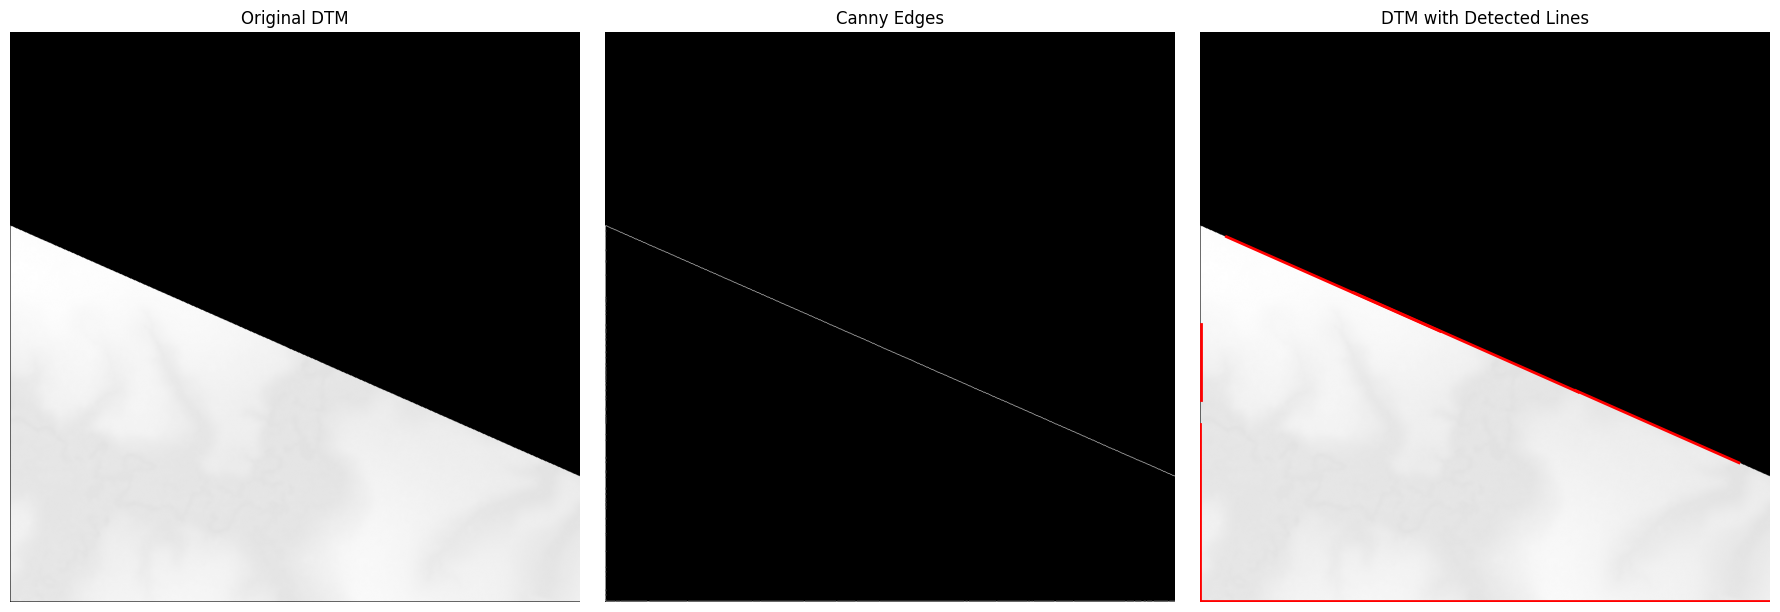

In [4]:
try:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Original DTM
    axes[0].imshow(dtm_data, cmap='gray')
    axes[0].set_title('Original DTM')
    axes[0].axis('off')

    # 2. Canny Edges
    axes[1].imshow(detected_edges, cmap='gray')
    axes[1].set_title('Canny Edges')
    axes[1].axis('off')

    # 3. DTM with Detected Lines
    axes[2].imshow(dtm_data, cmap='gray')
    if detected_lines is not None:
        for line in detected_lines:
            x1, y1, x2, y2 = line[0]
            axes[2].plot([x1, x2], [y1, y2], 'r-', linewidth=2)
    axes[2].set_title('DTM with Detected Lines')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()
except NameError:
    print("Could not generate visualization because data was not loaded or processed correctly.")